# WeatherPy

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from datetime import datetime

# Generate the cities list using citipy library

In [11]:
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude


In [26]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i].replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as E:
        #print(E)
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ranong
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | hong gai
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nizhniy kuranakh
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | camana
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | sao joao da barra
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kishtwar
Processing Record 16 of Set 1 | turukhansk
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | marcona
City not found. Skipping...
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | albany
Processing Recor

Processing Record 35 of Set 4 | cabo san lucas
Processing Record 36 of Set 4 | phuket
Processing Record 37 of Set 4 | bogande
Processing Record 38 of Set 4 | lubumbashi
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | angoche
Processing Record 41 of Set 4 | rogozno
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | vredendal
Processing Record 44 of Set 4 | dongkan
Processing Record 45 of Set 4 | imbituba
Processing Record 46 of Set 4 | elizabeth city
Processing Record 47 of Set 4 | haukipudas
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | ancud
Processing Record 0 of Set 5 | camacha
Processing Record 1 of Set 5 | grand forks
Processing Record 2 of Set 5 | ulladulla
Processing Record 3 of Set 5 | russell
Processing Record 4 of Set 5 | maniitsoq
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | havre
Processing Record 7 of Set 5 | rudnogorsk
Processing Record 8 of Set 5 | praia da vitoria
Processing

Processing Record 25 of Set 8 | sao miguel do iguacu
Processing Record 26 of Set 8 | yumen
Processing Record 27 of Set 8 | kavaratti
Processing Record 28 of Set 8 | gweru
Processing Record 29 of Set 8 | kahului
Processing Record 30 of Set 8 | kismayo
Processing Record 31 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 32 of Set 8 | qaanaaq
Processing Record 33 of Set 8 | parkes
Processing Record 34 of Set 8 | bardiyah
Processing Record 35 of Set 8 | palu
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | kijang
Processing Record 38 of Set 8 | barbar
City not found. Skipping...
Processing Record 39 of Set 8 | rawson
Processing Record 40 of Set 8 | toyooka
Processing Record 41 of Set 8 | nambucca heads
Processing Record 42 of Set 8 | darya khan
Processing Record 43 of Set 8 | matara
Processing Record 44 of Set 8 | hualmay
Processing Record 45 of Set 8 | dwarka
Processing Record 46 of Set 8 | colac
Processing Record 47 of Set 8 | tekkalakota
City no

Processing Record 15 of Set 12 | heishan
Processing Record 16 of Set 12 | hazebrouck
Processing Record 17 of Set 12 | debre tabor
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | dubuque
Processing Record 20 of Set 12 | nueva rosita
Processing Record 21 of Set 12 | nicoya
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | buribay
Processing Record 24 of Set 12 | ermoupolis
Processing Record 25 of Set 12 | shar
Processing Record 26 of Set 12 | seminole
Processing Record 27 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 28 of Set 12 | sao felix do xingu
Processing Record 29 of Set 12 | tanete
Processing Record 30 of Set 12 | wajir
Processing Record 31 of Set 12 | porto uniao
Processing Record 32 of Set 12 | zhezkazgan
Processing Record 33 of Set 12 | portel
Processing Record 34 of Set 12 | kosh-agach
Processing Record 35 of Set 12 | tahe
Processing Record 36 of Set 12 | okhotsk
Processing Record 37 of Set 12 

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ranong,9.9658,98.6348,24.30,83,72,1.32,TH,2023-03-04 20:08:13
1,bredasdorp,-34.5322,20.0403,19.84,87,93,1.75,ZA,2023-03-04 20:08:13
2,yulara,-25.2406,130.9889,19.87,21,0,1.54,AU,2023-03-04 20:08:14
3,kudahuvadhoo,2.6708,72.8944,27.16,75,74,5.04,MV,2023-03-04 20:08:14
4,hong gai,20.9560,107.0946,17.95,87,1,0.82,VN,2023-03-04 20:08:14


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("weather-data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("weather-data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ranong,9.9658,98.6348,24.30,83,72,1.32,TH,2023-03-04 20:08:13
1,bredasdorp,-34.5322,20.0403,19.84,87,93,1.75,ZA,2023-03-04 20:08:13
2,yulara,-25.2406,130.9889,19.87,21,0,1.54,AU,2023-03-04 20:08:14
3,kudahuvadhoo,2.6708,72.8944,27.16,75,74,5.04,MV,2023-03-04 20:08:14
4,hong gai,20.9560,107.0946,17.95,87,1,0.82,VN,2023-03-04 20:08:14


# Create the Scatter Plots requested

Latitude vs Temperature

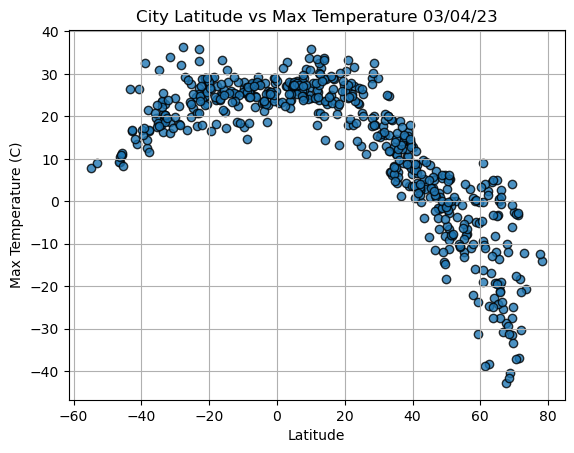

In [32]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("weather-data/Fig1.png")

# Show plot
plt.show()

Latitude vs Humidity

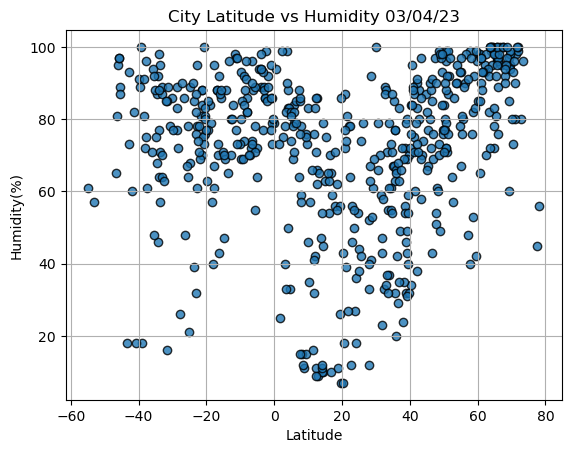

In [34]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("weather-data/Fig2.png")

# Show plot
plt.show()

Latitude vs Cloudiness

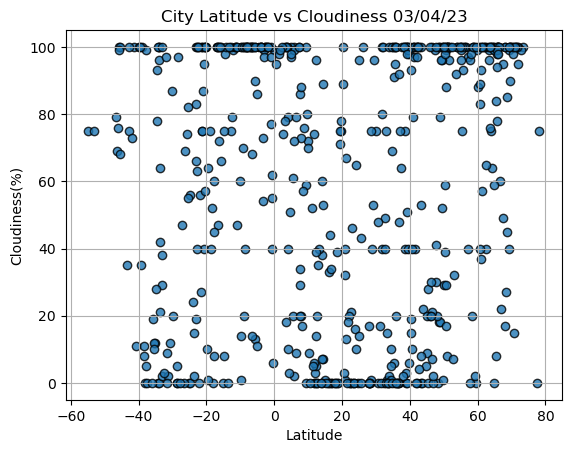

In [35]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]

plt.scatter(lat, cloud, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))
plt.grid(True)


# Save the figure
plt.savefig("weather-data/Fig3.png")

# Show plot
plt.show()

Latitude vs Wind Speed Plot

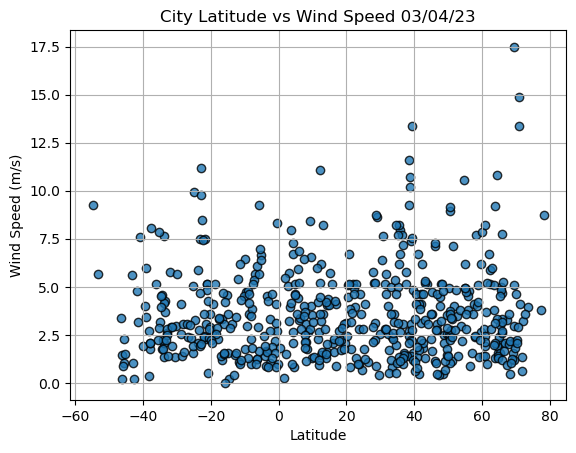

In [38]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]

plt.scatter(lat, wind, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("weather-data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [124]:
# Define a function to create Linear Regression plots


def plot_linear_regression(x_value, y_values, y_label, textcoords):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.annotate(line_eq, textcoords,
                fontsize=15,
                color='red')
    #plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.95), textcoords="axes fraction",color="red")
    
    plt.show()
    print(f"The r-value is: {rvalue:.3f}")


In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()
northern_hemi_df.count()

City          374
Lat           374
Lng           374
Max Temp      374
Humidity      374
Cloudiness    374
Wind Speed    374
Country       374
Date          374
dtype: int64

In [126]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()
southern_hemi_df.count()

City          182
Lat           182
Lng           182
Max Temp      182
Humidity      182
Cloudiness    182
Wind Speed    182
Country       178
Date          182
dtype: int64

# Temperature vs. Latitude Linear Regression Plot

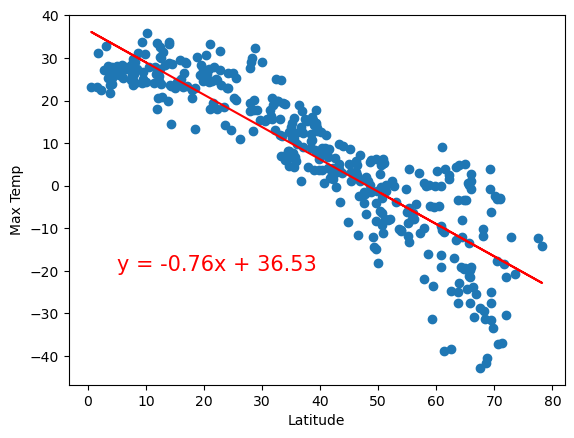

The r-value is: -0.887


In [127]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (5,-20))

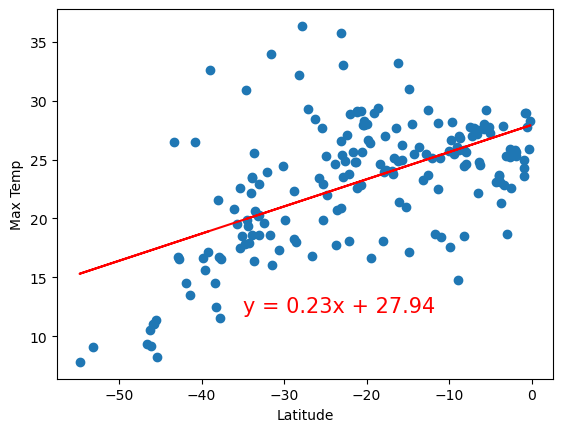

The r-value is: 0.560


In [128]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-35,12))

Discussion about the linear relationship: Lineaer regression in Northern Hemisphere plot demonstrates a stong negative correlation between Latitude and Maximum Temperature. The higher the latitude of the city (the farther away it is from zero), the lower is the temperature. 
Similar correlation is found in nthe Southern Hemusphere plot. The closer latitude is to zero, the higher the temperature is. This is logical as zero latitude is the point of the Equator therefore the temperature there is the highest.

# Humidity vs. Latitude Linear Regression Plot

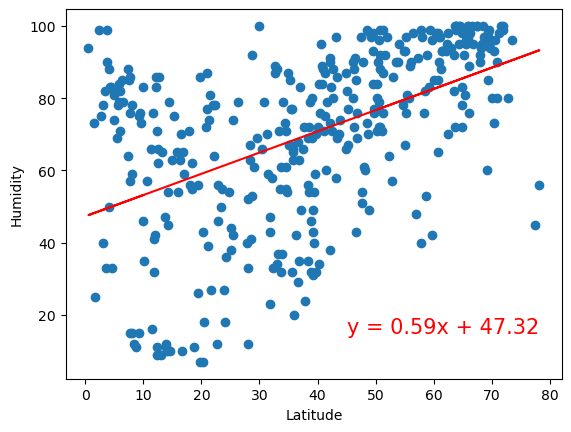

The r-value is: 0.498


In [131]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (45,15))

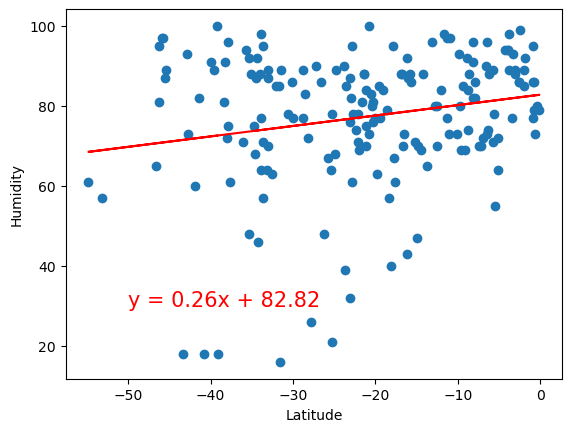

The r-value is: 0.206


In [136]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (-50,30))

Discussion about the linear relationship: Comparing these two plots from Nothern and Southern Hemispheres, we can see a weak correlation between the latitude and humidity. It seems that the higher the latitude, the higher the humidity is. However the r-value is quite different in the two plots to be confident about this correlation. 

# Cloudiness vs. Latitude Linear Regression Plot

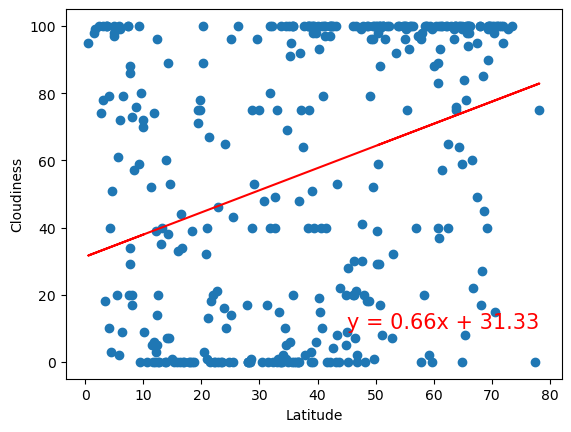

The r-value is: 0.329


In [138]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (45,10))

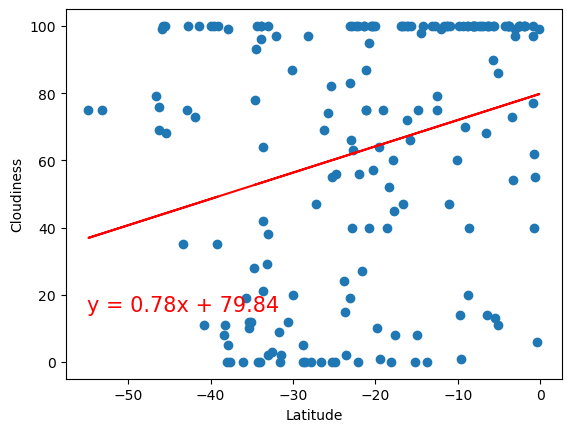

The r-value is: 0.271


In [140]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (-55,15))

Discussion about the linear relationship: There doesn't seem to be a strong relationship between Latitude and cloudiness, however the scatter plots look somewhat similar in both hemispheres, with evenly distributed cloudiness variable, with clusters of cities at the very top of the chart.

# Wind Speed vs. Latitude Linear Regression Plot

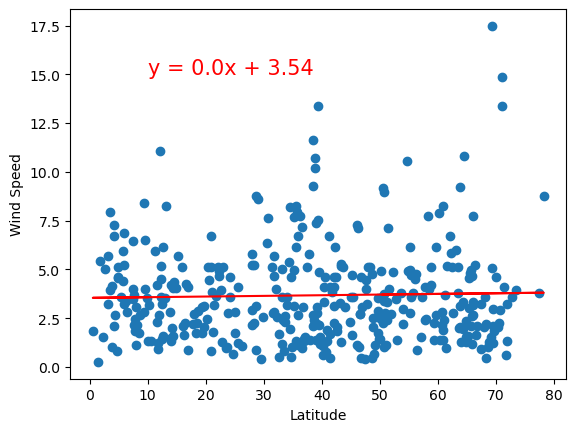

The r-value is: 0.028


In [142]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (10,15))

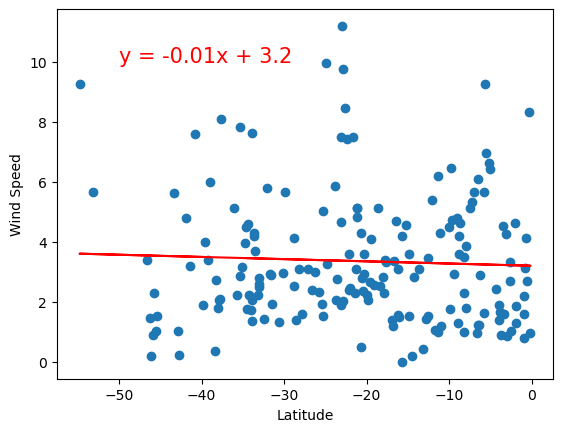

The r-value is: -0.045


In [144]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-50,10))

Discussion about the linear relationship: No correlation is found between latitude and wind speed. Overall, the data is not fully representative due to being collected on a certain date, perhaps using Historic data would be more appropriate when analysing relationship between these variables. 